<h1>Prediksi Peminjaman Uang</h1>

Sumber dataset: <a href="https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/">Analytics Vidhya</a>
<br><br>
Dataset ini adalah untuk klasifikasi apakan seorang aplikan layak diberikan pinjaman bank atau tidak, dengan atribut sebagai berikut:
<li><b>Jenis kelamin</b></li>
<li><b>Status pernikahan</b></li>
<li><b>Jumlah anggota keluarga</b></li>
<li><b>Pendidikan terakhir</b></li>
<li><b>Status pekerjaan</b></li>
<li><b>Pendapatan aplikan</b></li>
<li><b>Pendapatan ko-aplikan</b></li>
<li><b>Jumlah peminjaman (ribuan)</b></li>
<li><b>Durasi peminjaman (bulan)</b></li>
<li><b>Sejarah kredit</b></li>
<li><b>Daerah tempat tinggal</b></li>
<br>
Dengan tujuan kelas: <b>aplikasi diterima (Y)</b> atau <b>aplikasi tidak diterima (N)</b>

<h3>Informasi Dataset</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataTrain = pd.read_csv('train.csv')
dataTrain.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
print("Ukuran data : ", dataTrain.shape)
print("Jumlah data : ", len(dataTrain))
print("Jumlah fitur: ", len(dataTrain.columns))

Ukuran data :  (614, 13)
Jumlah data :  614
Jumlah fitur:  13


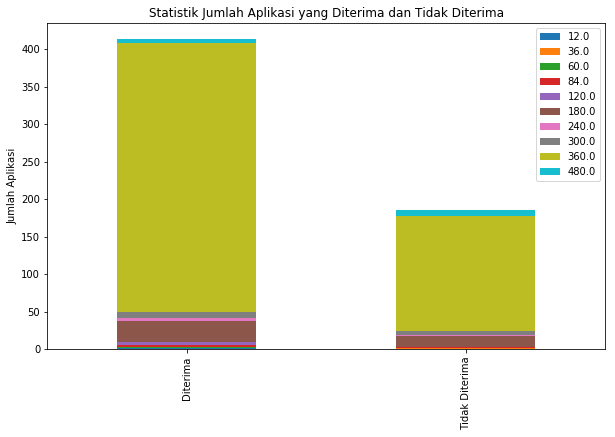

In [4]:
approved = dataTrain[dataTrain['Loan_Status'] == 'Y']['Loan_Amount_Term'].value_counts()
unapproved = dataTrain[dataTrain['Loan_Status'] == 'N']['Loan_Amount_Term'].value_counts()
loan_stat = pd.DataFrame([approved, unapproved], index=['Diterima', 'Tidak Diterima'])
loan_stat.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Statistik Jumlah Aplikasi yang Diterima dan Tidak Diterima')
plt.ylabel('Jumlah Aplikasi')
plt.show()

<h3><i>Missing Values</i></h3>

Beberapa data memiliki nilai yang hilang (<i>missing value</i>). Berikut rincian jumlah baris yang memiliki nilai yang hilang.

In [5]:
dataTrain.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Total ada 150 <i>cell</i> yang memiliki nilai yang hilang dan dan tersebar pada tujuh atribut. Terdapat tiga cara untuk berurusan dengan nilai yang hilang: tidak melakukan apa-apa, menghapus baris, atau mengisi nilai. Berurusan dengan nilai ini sangat dipengaruhi oleh pengetahuan data analis pada ranah yang bersangkutan. Untuk informasi lebih lanjut, dapat dilihat pada <a href="https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4">artikel ini</a>.

Perlu diketahui, penulis kurang memiliki pengetahuan terkait peminjaman bank. Pengapusan dan pengisian nilai yang akan dilakukan berikut dilakukan secara subjektif menurut intuisi penulis.

Credit_History sepertinya akan sangat mempengaruhi status penerimaan aplikan. Oleh karena itu, sangat tidak bijak jika mengisinya dengan nilai tertentu. Jadi, sampel yang memiliki nilai yang hilang pada kolom <b>Credit_History akan dihapus</b>.

Terkait enam atribut lainnya, akan diisi dengan rata-rata atau modus, sesuai dengan tipe data. <b>Gender, Married, Dependents, Self_Employed, dan Loan_Amount_Term akan diisi dengan modus</b>. Sementara <b>LoanAmount akan diisi dengan rata-rata</b>.

In [6]:
dataTrain = dataTrain.dropna(subset=['Credit_History'])

gender_mode = dataTrain.mode()['Gender'][0]
married_mode = dataTrain.mode()['Married'][0]
dependents_mode = dataTrain.mode()['Dependents'][0]
self_employed_mode = dataTrain.mode()['Self_Employed'][0]
loan_amount_term_mode = dataTrain.mode()['Loan_Amount_Term'][0]
loan_amount_mean = dataTrain['LoanAmount'].mean()

print("Modus Gender          :", gender_mode)
print("Modus Married         :", married_mode)
print("Modus Dependents      :", dependents_mode)
print("Modus Self_Employed   :", self_employed_mode)
print("Modus Loan_Amount_Term: %d" % loan_amount_term_mode)
print("Rata-rata LoanAmount  : %.0f" % loan_amount_mean)

Modus Gender          : Male
Modus Married         : Yes
Modus Dependents      : 0
Modus Self_Employed   : No
Modus Loan_Amount_Term: 360
Rata-rata LoanAmount  : 145


In [7]:
dataTrain[['Gender']] = dataTrain[['Gender']].fillna(gender_mode)
dataTrain[['Married']] = dataTrain[['Married']].fillna(married_mode)
dataTrain[['Dependents']] = dataTrain[['Dependents']].fillna(dependents_mode)
dataTrain[['Self_Employed']] = dataTrain[['Self_Employed']].fillna(self_employed_mode)
dataTrain[['Loan_Amount_Term']] = dataTrain[['Loan_Amount_Term']].fillna(loan_amount_term_mode)
dataTrain[['LoanAmount']] = dataTrain[['LoanAmount']].fillna(loan_amount_mean)

print("Ukuran data menjadi :", dataTrain.shape)
print("Jumlah data menjadi :", len(dataTrain))

Ukuran data menjadi : (564, 13)
Jumlah data menjadi : 564


<h3>Konversi Tipe Data</h3>

Beberapa attribut memiliki tipe data kategorikal, misalnya Gender bernilai ('Male' atau 'Female'), Property_Area bernilai ('Urban', 'Semiurban', atau 'Rural'). Model <i>machine learning</i> tidak bisa memproses informasi ini, sehingga perlu dilakukan <i>encoding</i> atau konversi tipe data menjadi numerik.

In [8]:
dataTrain.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,145.088398,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [9]:
# Fungsi untuk mengubah Loan_Amount_Term
def set_term(row):
    if row['Loan_Amount_Term'] <= 60: # jangka sangat pendek
        return 1
    elif (row['Loan_Amount_Term'] > 60) and (row['Loan_Amount_Term'] < 180): # jangka pendek
        return 2
    elif (row['Loan_Amount_Term'] >= 180 ) and (row['Loan_Amount_Term'] <= 300): # jangka panjang
        return 3
    elif row['Loan_Amount_Term'] > 60: # jangka sangat panjang
        return 4
    else:
        return 0

In [10]:
# Ubah Gender, Male = 1, Female = 1
dataTrain['Gender'] = dataTrain['Gender'].map({'Male':1,'Female':0})

# Ubah Married, Yes = 1, No = 0
dataTrain['Married'] = dataTrain['Married'].map({'Yes':1,'No':0})

# Ubah Dependents, 0 = 0, 1 = 1, 2 = 2, 3+ = 3
dataTrain.loc[dataTrain['Dependents'] == '0', 'Dependents'] = 0 # no dependents
dataTrain.loc[dataTrain['Dependents'] == '1', 'Dependents'] = 1 # singleton
dataTrain.loc[dataTrain['Dependents'] == '2', 'Dependents'] = 2 # small family
dataTrain.loc[dataTrain['Dependents'] == '3+', 'Dependents'] = 3 # large family

# Ubah Education, Graduate = 1, Not Graduate = 0
dataTrain['Education'] = dataTrain['Education'].map({'Graduate':1,'Not Graduate':0})

# Ubah Self_Employed, Yes = 1, No = 0
dataTrain['Self_Employed'] = dataTrain['Self_Employed'].map({'Yes':1,'No':0})

# Tambahkan AplicantIncome dan CoapplicantIncome menjadi Total_Income
dataTrain['Total_Income'] = dataTrain['ApplicantIncome'] + dataTrain['CoapplicantIncome']
dataTrain.drop(['ApplicantIncome','CoapplicantIncome'], axis=1, inplace=True)

# Rasio Total_Income dan LoanAmount menjadi Debt_Income_Ratio
dataTrain['Debt_Income_Ratio'] = dataTrain['Total_Income'] / dataTrain['LoanAmount']
del dataTrain['Total_Income']
del dataTrain['LoanAmount']

# Ubah Loan_Amount_Term sesuai kategori
dataTrain = dataTrain.assign(Loan_Amount_Term=dataTrain.apply(set_term, axis=1))

# Ubah tipe data Credit_History
dataTrain.Credit_History = dataTrain.Credit_History.astype(int)

# Ubah Property_Area, Rural = 0, Semiurban = 1, Urban = 2
dataTrain.loc[dataTrain['Property_Area'] == 'Rural', 'Property_Area'] = 0
dataTrain.loc[dataTrain['Property_Area'] == 'Semiurban', 'Property_Area'] = 1
dataTrain.loc[dataTrain['Property_Area'] == 'Urban', 'Property_Area'] = 2

# Ubah Loan_Status, Y = 1, N = 0
dataTrain['Loan_Status'] = dataTrain['Loan_Status'].map({'Y':1,'N':0})

# Rapihkan dataFrame
cols = list(dataTrain.columns.values)
cols.pop(cols.index('Loan_Status'))
dataTrain = dataTrain[cols + ['Loan_Status']]

In [11]:
dataTrain.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Debt_Income_Ratio,Loan_Status
0,LP001002,1,0,0,1,0,4,1,2,40.313354,1
1,LP001003,1,1,1,1,0,4,1,0,47.585938,0
2,LP001005,1,1,0,1,1,4,1,2,45.454545,1
3,LP001006,1,1,0,0,0,4,1,2,41.175000,1
4,LP001008,1,0,0,1,0,4,1,2,42.553191,1


In [12]:
dataFeature = dataTrain.loc[:, 'Gender':'Debt_Income_Ratio']
dataTarget = dataTrain.loc[:, 'Loan_Status']

<h3>Model Machine Learning</h3>

Akan dilakukan klasifikasi dengan <b>Random Forest</b>. Validasi dilakukan dengan Grid Search Cross Validation. Hyperparameter dengan performa yang terbaik akan diuji ke data uji.

In [13]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [14]:
X = dataFeature.values
y = dataTarget.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Jumlah data latih   : ", len(X_train))
print("Jumlah data uji     : ", len(X_test))

Jumlah data latih   :  451
Jumlah data uji     :  113


In [15]:
parameters = {'n_estimators': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
scores = ['accuracy']
clf = GridSearchCV(RandomForestClassifier(), parameters, cv=10, scoring='accuracy')
for score in scores:                
    clf.fit(X_train, y_train)
    print("Parameter terbaik:\n")        
    print(clf.best_params_)
    print()
    print("Dengan akurasi:\n")        
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) untuk %r"
              % (mean, std * 2, params))

Parameter terbaik:

{'n_estimators': 100}

Dengan akurasi:

0.696 (+/-0.170) untuk {'n_estimators': 1}
0.743 (+/-0.157) untuk {'n_estimators': 10}
0.752 (+/-0.157) untuk {'n_estimators': 20}
0.761 (+/-0.137) untuk {'n_estimators': 30}
0.763 (+/-0.136) untuk {'n_estimators': 40}
0.769 (+/-0.164) untuk {'n_estimators': 50}
0.776 (+/-0.142) untuk {'n_estimators': 60}
0.776 (+/-0.149) untuk {'n_estimators': 70}
0.767 (+/-0.156) untuk {'n_estimators': 80}
0.783 (+/-0.158) untuk {'n_estimators': 90}
0.785 (+/-0.156) untuk {'n_estimators': 100}


In [20]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
features = pd.DataFrame()
features['Feature'] = dataFeature.columns
features['Importance'] = clf.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)

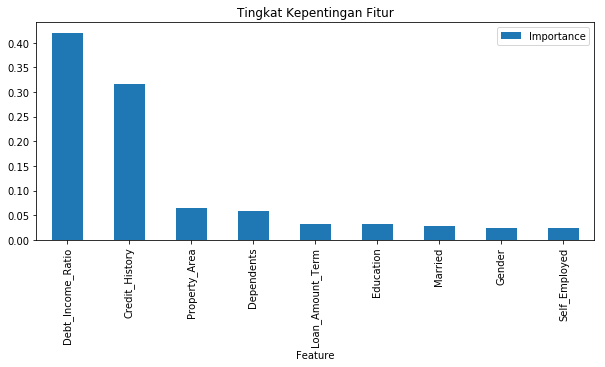

In [22]:
features.plot(kind='bar', figsize=(10, 4))
plt.title('Tingkat Kepentingan Fitur')
plt.show()

In [23]:
y_pred = clf.predict(X_test)
acc = accuracy_score(y_pred, y_test) * 100
print("Klasifikasi model mendapat akurasi: %.2f" % acc, "%")

Klasifikasi model mendapat akurasi: 76.99 %
